XGBoost Regressor Performance:
MAE: 171179.57
MSE: 84251070617.66
R2 Score: 0.44



<Figure size 800x500 with 0 Axes>

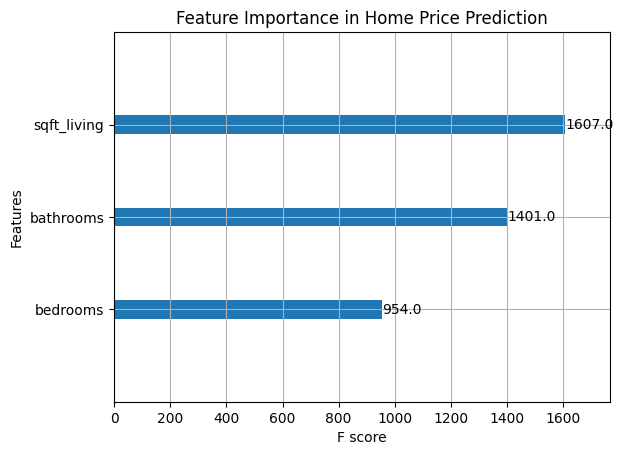

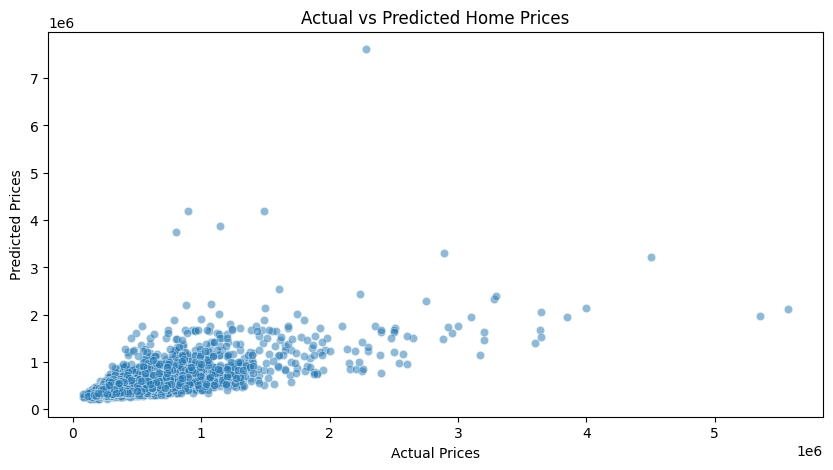

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("kc_house_data.csv")

# Selecting features and target variable
features = ["income", "school_quality", "hospital_access", "crime_rate", "sqft_living", "bedrooms", "bathrooms"]
target = "price"

# Check if required columns exist in the dataset
valid_features = [col for col in features if col in df.columns]
if not valid_features:
    raise ValueError("None of the specified features are present in the dataset.")

X = df[valid_features]
y = df[target]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    X_train.fillna(X_train.median(), inplace=True)
    X_test.fillna(X_test.median(), inplace=True)
if y_train.isnull().sum() > 0 or y_test.isnull().sum() > 0:
    y_train.fillna(y_train.median(), inplace=True)
    y_test.fillna(y_test.median(), inplace=True)

# XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.2f}\n")

# Evaluate XGBoost model
evaluate_model("XGBoost Regressor", y_test, xgb_preds)

# Feature importance plot
plt.figure(figsize=(8, 5))
xgb.plot_importance(xgb_model)
plt.title("Feature Importance in Home Price Prediction")
plt.show()

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=xgb_preds, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Home Prices")
plt.show()